In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [11]:
pd.options.display.max_columns = 100

In [3]:
feature_df = pd.read_feather('Data/feature_df')

In [4]:
feature_df.head()

,match_id,season,week,team,host,result,d_carries,d_clean_breaks,d_conversion_accuracy,d_conversions,...,d_rucks_won,d_score,d_scrums_lost,d_scrums_won,d_tackles,d_tries,d_turnovers_conceded,d_turnovers_won,d_yellow_cards,d_score_diff
0,46,2012,7,Blues,1,0,11.6,-0.4,10.00,0.4,...,9.4,2.0,-0.4,0.4,-46.6,0.6,1.8,0.0,0.2,7.4
1,48,2012,8,Blues,0,0,-8.6,-1.8,5.00,-1.8,...,3.4,-5.6,-0.4,-0.6,-48.4,-1.6,2.4,0.0,0.4,-4.6
2,55,2012,9,Blues,1,0,-53.6,-3.4,38.58,-0.6,...,-38.8,1.0,-0.8,1.6,24.2,-0.6,1.4,0.0,0.2,-6.8
3,60,2012,10,Blues,0,0,-5.6,-1.0,23.32,-0.2,...,-1.2,6.6,-0.4,-1.4,-20.4,-0.2,1.2,0.0,-0.4,11.2
4,70,2012,11,Blues,1,0,1.2,-4.2,10.00,-1.8,...,6.2,-5.0,-0.8,0.4,-38.6,-1.8,2.4,0.0,0.0,-0.4


In [5]:
# covert team to numeric
teams = feature_df.team.cat.categories
feature_df.team = feature_df.team.cat.codes

In [6]:
feature_df.head()

,match_id,season,week,team,host,result,d_carries,d_clean_breaks,d_conversion_accuracy,d_conversions,...,d_rucks_won,d_score,d_scrums_lost,d_scrums_won,d_tackles,d_tries,d_turnovers_conceded,d_turnovers_won,d_yellow_cards,d_score_diff
0,46,2012,7,0,1,0,11.6,-0.4,10.00,0.4,...,9.4,2.0,-0.4,0.4,-46.6,0.6,1.8,0.0,0.2,7.4
1,48,2012,8,0,0,0,-8.6,-1.8,5.00,-1.8,...,3.4,-5.6,-0.4,-0.6,-48.4,-1.6,2.4,0.0,0.4,-4.6
2,55,2012,9,0,1,0,-53.6,-3.4,38.58,-0.6,...,-38.8,1.0,-0.8,1.6,24.2,-0.6,1.4,0.0,0.2,-6.8
3,60,2012,10,0,0,0,-5.6,-1.0,23.32,-0.2,...,-1.2,6.6,-0.4,-1.4,-20.4,-0.2,1.2,0.0,-0.4,11.2
4,70,2012,11,0,1,0,1.2,-4.2,10.00,-1.8,...,6.2,-5.0,-0.8,0.4,-38.6,-1.8,2.4,0.0,0.0,-0.4


In [7]:
# train and test set separation
# let test set be 2017 data set
train = feature_df[feature_df.season != 2017].copy()
test = feature_df[feature_df.season == 2017].copy()

In [8]:
train.shape, test.shape

((818, 37), (176, 37))

In [9]:
y = train.result
X = train.drop('result', axis=1)

# Using Logistic Regression

In [13]:
# one hot encode team
X_log = pd.get_dummies(X, columns=['team'])

In [15]:
X_log.head()

,match_id,season,week,host,d_carries,d_clean_breaks,d_conversion_accuracy,d_conversions,d_defenders_beaten,d_drop_goal_accuracy,d_drop_goals,d_kicks_in_play,d_lineouts_lost,d_lineouts_won,d_mauls_won,d_meters_carried,d_missed_tackels,d_offloads,d_overall_pos,d_passes,d_penalties_conceded,d_penalty_goal_accuracy,d_penalty_goals,d_red_cards,d_rucks_lost,d_rucks_won,d_score,d_scrums_lost,d_scrums_won,d_tackles,d_tries,d_turnovers_conceded,d_turnovers_won,d_yellow_cards,d_score_diff,team_0,team_1,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,team_13,team_14,team_15,team_16,team_17
0,46,2012,7,1,11.6,-0.4,10.00,0.4,-5.4,0.0,0.2,0.6,2.2,0.4,0.0,-57.4,-0.6,-0.4,2.438102,0.6,-0.8,-17.92,0.8,0.0,0.2,9.4,2.0,-0.4,0.4,-46.6,0.6,1.8,0.0,0.2,7.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,2012,8,0,-8.6,-1.8,5.00,-1.8,-3.2,0.0,0.0,-1.6,2.2,-0.6,0.0,-113.6,-6.4,-4.0,-17.800000,-12.2,-0.4,-28.26,3.0,0.0,-1.4,3.4,-5.6,-0.4,-0.6,-48.4,-1.6,2.4,0.0,0.4,-4.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,2012,9,1,-53.6,-3.4,38.58,-0.6,-7.2,0.0,0.0,1.8,1.0,-2.6,0.0,-295.0,5.2,-7.2,-15.020197,-50.6,-0.8,19.08,0.6,0.0,-1.2,-38.8,1.0,-0.8,1.6,24.2,-0.6,1.4,0.0,0.2,-6.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60,2012,10,0,-5.6,-1.0,23.32,-0.2,-2.0,20.0,0.2,-2.6,1.0,1.2,0.0,-121.6,-4.6,1.0,-1.200000,4.8,-2.2,42.14,1.6,0.0,1.0,-1.2,6.6,-0.4,-1.4,-20.4,-0.2,1.2,0.0,-0.4,11.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70,2012,11,1,1.2,-4.2,10.00,-1.8,-5.6,20.0,0.2,-3.0,1.2,3.6,0.0,-148.2,-4.8,-0.6,-16.200000,23.8,-4.0,41.14,1.2,0.0,1.2,6.2,-5.0,-0.8,0.4,-38.6,-1.8,2.4,0.0,0.0,-0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# scaling the values
scaler = StandardScaler()
scaler.fit(X_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_log_scaled = scaler.transform(X_log)

In [31]:
# logistic regression
# usign grid search to find best hyper parameters
logr = LogisticRegression()
logr_para = {'C':[1, 0.1, 0.01, 0.001, 0.0001]}

clf = GridSearchCV(logr, logr_para, cv = 5, scoring='neg_log_loss', n_jobs=-1)
clf.fit(X_log_scaled,y)
(clf.best_params_, clf.best_score_)

({'C': 0.01}, -0.6252963722477286)

# Using Random Forest

In [38]:
# usign grid search to find best hyper parameters

rf = RandomForestClassifier(n_jobs=-1)
rf_para = {'max_features':[0.8,0.7,0.6], 'min_samples_leaf':[3,4,5], 
           'n_estimators':[50,75,100]}

clf = GridSearchCV(rf, rf_para, cv = 5, scoring='neg_log_loss', n_jobs=-1)
clf.fit(X,y)
(clf.best_params_, clf.best_score_)

({'max_features': 0.8, 'min_samples_leaf': 5, 'n_estimators': 100},
 -0.62603500103701826)

# Using XGBoost

In [32]:
# usign grid search to find best hyper parameters
xgb = XGBClassifier(n_jobs=-1)
xg_para = {'max_depth':[2,3], 'learning_rate':[0.05,0.1,0.15], 
           'n_estimators':[75, 100,150], 
           'subsample':[0.6,0.7,0.8]}

clf = GridSearchCV(xgb, xg_para, cv = 5, scoring='neg_log_loss', n_jobs=-1)
clf.fit(X,y)
(clf.best_params_, clf.best_score_)

({'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 75, 'subsample': 0.8},
 -0.61747648000425703)

# Final Model

In [39]:
# Final model with train data
xgb = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=75, 
                    subsample=0.8, n_jobs=-1)
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=75,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [41]:
# feature importance
pd.DataFrame({'cols':X.columns, 'imp':xgb.feature_importances_}).\
        sort_values('imp', ascending = False)

,cols,imp
35,d_score_diff,0.200000
4,host,0.177778
19,d_overall_pos,0.071111
15,d_mauls_won,0.066667
14,d_lineouts_won,0.062222
23,d_penalty_goals,0.053333
7,d_conversion_accuracy,0.048889
30,d_tackles,0.040000
29,d_scrums_won,0.031111
6,d_clean_breaks,0.022222


Key take aways

Most important chacteristics

* Score difference - If you ahve succesfully secured healthy score differnce in previous games that suggest that your a strong team going in to the next match

* Host - Home advantage. You get the crowd support and after this where you practice.

* Overall posestion - Possestion suggest that you have the ball in hand. not giving the ball away. More possestion you have your more likely to score and win matches

* Mauls won and Line outs won - These are critical set plays in a game of rugby. Dominating set pieces is very important. few steps down is scrums won. Which another critical set piece

* Penalty goals - This is the number of penalty goals kicked. This could be due to a very reliable kicker and/or team good at earning penalites by putting pressure on the opposing team

In [38]:
# predicted probability of winning
win_prob = xgb.predict_proba(X)[:,1]

In [39]:
win_prob.shape

(818,)

In [51]:
# let get prediction accuracy tranining
match_winning = X[['match_id', 'season', 'team', 'host']].copy()
match_winning['win_prob'] = win_prob
match_winning['result'] = y.copy()

In [52]:
match_winning.head()

,match_id,season,team,host,win_prob,result
0,46,2012,0,1,0.470485,0
1,48,2012,0,0,0.350050,0
2,55,2012,0,1,0.295799,0
3,60,2012,0,0,0.638696,0
4,70,2012,0,1,0.261995,0


In [53]:
match_winning_host = match_winning[match_winning.host==0].copy().\
                        sort_values("match_id").reset_index(drop=True)
match_winning_host.columns = ['match_id', 'season', 'team1', 'host1', 'win_prob1', 'result1']

In [57]:
match_winning_visit = match_winning[match_winning.host==1].copy().\
                        sort_values("match_id").reset_index(drop=True)
match_winning_visit.columns = ['match_id', 'season', 'team2', 'host2', 'win_prob2', 'result2']

In [58]:
match_winning_host.head()

,match_id,season,team1,host1,win_prob1,result1
0,36,2012,6,0,0.582641,1
1,38,2012,8,0,0.653411,0
2,41,2012,2,0,0.733430,1
3,42,2012,3,0,0.744781,1
4,43,2012,6,0,0.376136,0


In [59]:
match_winning_visit.head()

,match_id,season,team2,host2,win_prob2,result2
0,36,2012,13,1,0.395106,0
1,38,2012,3,1,0.330723,1
2,41,2012,5,1,0.255349,0
3,42,2012,11,1,0.262910,0
4,43,2012,4,1,0.606263,1


In [61]:
match_winning = match_winning_host.merge(match_winning_visit, on = ['match_id', 'season'])

In [62]:
match_winning.head()

,match_id,season,team1,host1,win_prob1,result1,team2,host2,win_prob2,result2
0,36,2012,6,0,0.582641,1,13,1,0.395106,0
1,38,2012,8,0,0.653411,0,3,1,0.330723,1
2,41,2012,2,0,0.733430,1,5,1,0.255349,0
3,42,2012,3,0,0.744781,1,11,1,0.262910,0
4,43,2012,6,0,0.376136,0,4,1,0.606263,1


In [74]:
match_winning['host_wins'] = \
            [int(v) for v in match_winning.win_prob1 >= match_winning.win_prob2]

In [75]:
# Traning accuracy
np.mean(match_winning.result1 == match_winning.host_wins)

0.74327628361858189

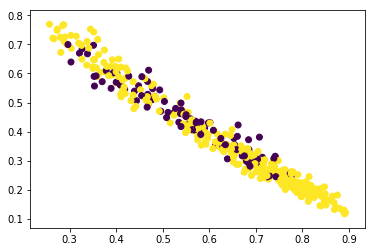

In [79]:
# let find out where things goes wrong
plt.scatter(match_winning.win_prob1, match_winning.win_prob2, 
            c = (match_winning.result1 == match_winning.host_wins))

# Get test set accuracy

In [46]:
win_prob_test = xgb.predict_proba(test.drop('result', axis=1))[:,1]

In [47]:
# let get prediction accuracy test
match_winning_test = test[['match_id', 'season', 'team', 'host']].copy()
match_winning_test['win_prob'] = win_prob_test
match_winning_test['result'] = test.result.copy()

# for host
match_winning_host_test = match_winning_test[match_winning_test.host==0].copy().\
                        sort_values("match_id").reset_index(drop=True)
match_winning_host_test.columns = ['match_id', 'season', 'team1', 'host1', 
                              'win_prob1', 'result1']
# for guest
match_winning_visit_test = match_winning_test[match_winning_test.host==1].copy().\
                        sort_values("match_id").reset_index(drop=True)
match_winning_visit_test.columns = ['match_id', 'season', 'team2', 'host2', 
                               'win_prob2', 'result2']

match_winning_test = match_winning_host_test.merge(match_winning_visit_test, 
                                                   on = ['match_id', 'season'])

match_winning_test['host_wins'] = \
            [int(v) for v in match_winning_test.win_prob1 >= match_winning_test.win_prob2]
    
np.mean(match_winning_test.result1 == match_winning_test.host_wins)

0.71590909090909094